In [1]:
import numpy as np
import itertools
import pandas as pd
import os 

dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    f"adjusted_malt",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]


# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
# models = [f"Rosenbrock_{D*2}" for D in Ds]


models = [f"Gaussian_{dim}" for dim in dims]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)
# df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]


df = df[(df["statistic"] == 'square') | (df['statistic'] == 'x2') ]
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Adjusted'] = df['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': True,
    'unadjusted_microcanonical__velocity_verlet':False,
    'underdamped_langevin_velocity_verlet': False,
    'adjusted_hmc_velocity_verlet': True,
    'adjusted_malt': True,
}.get)
df['Sampler'] = df['Sampler'].apply({
    'unadjusted_microcanonical__velocity_verlet':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'MCLMC',
    'underdamped_langevin_velocity_verlet': 'LMC',
    'adjusted_hmc_velocity_verlet': 'HMC',
    'adjusted_malt': 'LMC',
}.get)
# df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
# df['Sampler'] = df['Sampler'].apply({
#     'unadjusted_microcanonical__velocity_verlet': 'unadjusted_microcanonical_velocity_verlet',
#     'adjusted_microcanonical_velocity_verlet': 'adjusted_microcanonical_velocity_verlet',
#     'underdamped_langevin_velocity_verlet': 'underdamped_langevin_velocity_verlet',
#     'adjusted_hmc_velocity_verlet': 'adjusted_hmc_velocity_verlet',
#     'adjusted_malt': 'adjusted_malt',
# }.get)
df['ESS'] = 100/df["num_grads_to_low_error"]
df[df['Integrator']=='velocity_verlet']
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']

df

,Unnamed: 0,Sampler,Model,num_grads_to_low_error,max,statistic,num_tuning_grads,L,step_size,ess_corr,dim,Integrator,Adjusted,ESS
1,1,MCLMC,Gaussian_2,145.220479,False,x2,30163.607143,1.461078,1.328034,NaN,2,verlet,True,0.688608
5,1,MCLMC,Gaussian_3,167.200000,False,x2,19713.222552,1.796707,1.633370,NaN,3,verlet,True,0.598086
9,1,MCLMC,Gaussian_4,174.900000,False,x2,20106.944882,2.045166,1.859242,NaN,4,verlet,True,0.571755
13,1,MCLMC,Gaussian_5,178.200000,False,x2,20467.357843,2.291240,2.082946,NaN,5,verlet,True,0.561167
17,1,MCLMC,Gaussian_6,185.900000,False,x2,20741.588235,2.511514,2.283194,NaN,6,verlet,True,0.537924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,5,LMC,Gaussian_100,860.048574,False,square,86334.357143,1.288394,0.344740,NaN,100,malt,True,0.116273
289,5,LMC,Gaussian_563,1347.262815,False,square,152618.600000,1.311971,0.226975,NaN,563,malt,True,0.074225
295,5,LMC,Gaussian_3163,2150.029483,False,square,110300.750000,1.372151,0.148791,NaN,3163,malt,True,0.046511
301,5,LMC,Gaussian_17783,3325.054477,False,square,171183.500000,1.354825,0.098683,NaN,17783,malt,True,0.030075


Text(0.5, 1.0, 'Standard normal with Metropolis adjusted microcanonical sampler')

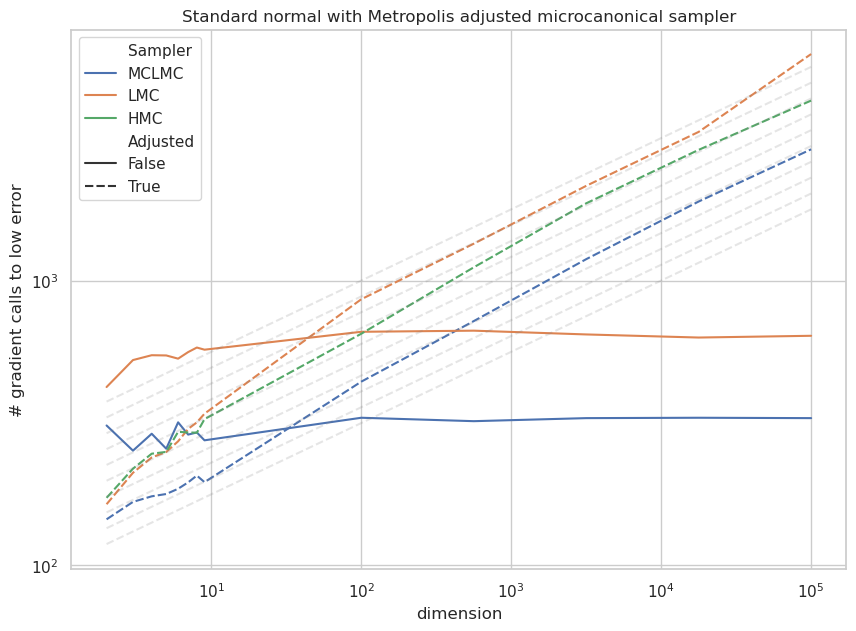

In [2]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(2,2.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Standard normal with Metropolis adjusted microcanonical sampler")

In [3]:
# Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:12]
Ds*2

NameError: name 'Ds' is not defined

Text(0.5, 1.0, 'Rosenbrock: adjusted vs unadjusted')

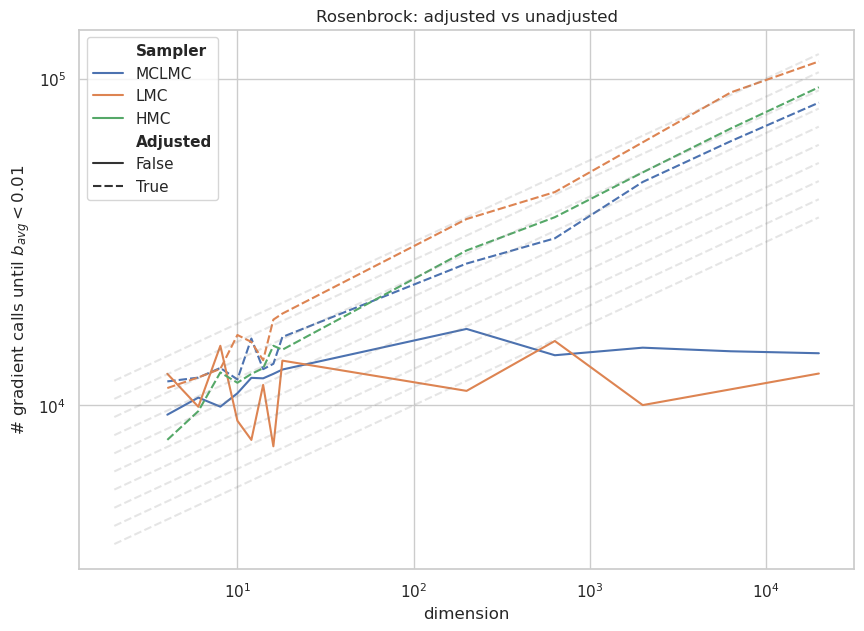

In [5]:
import numpy as np
import itertools
import pandas as pd
import os 

# dims = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,5, 5)).astype(int)])[:7]

integrator_types = ['velocity_verlet'
                    # , 'mclachlan', 
                    # 'omelyan'
                    ]

samplers = [[
    
    f"adjusted_microcanonical_{integrator_type}", 
    f"unadjusted_microcanonical__{integrator_type}",
    f"underdamped_langevin_{integrator_type}",
    f"adjusted_hmc_{integrator_type}",
    f"adjusted_malt",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#         f"grid_search_unadjusted_lmc_{integrator_type}",
    
# #     f"grid_search_adjusted_microcanonical_{integrator_type}",
# #     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]

# grid_samplers = [
#     x
#     for xs in grid_samplers
#     for x in xs
# ]

# grid_samplers = [f'grid_search_unadjusted_lmc']

# print(grid_samplers)


Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]
models = [f"Rosenbrock_{D*2}" for D in Ds]

df_rsbr_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

# df_rsbr_grid = pd.concat([pd.read_csv(f"results/grid_search/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(grid_samplers, models)], ignore_index=True)

df_rsbr = pd.concat([df_rsbr_tuned], ignore_index=True)


df_rsbr["dim"] = df_rsbr["Model"].str.extract(r"(\d+)").astype(int)

df_rsbr = df_rsbr[df_rsbr["max"] == False]
df_rsbr = df_rsbr[(df_rsbr["statistic"] == 'square') | (df_rsbr['statistic'] == 'x2') ]
# df_rsbr['Integrator'] = df_rsbr['Sampler'].apply(lambda x: x.split('_')[-1])
# df_rsbr['Sampler'] = df_rsbr['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df_rsbr['Adjusted'] = df_rsbr['Sampler'].apply({
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': True,
    'unadjusted_microcanonical__velocity_verlet':False,
    'underdamped_langevin_velocity_verlet': False,
    'adjusted_hmc_velocity_verlet': True,
    'adjusted_malt': True,
}.get)
df_rsbr['Sampler'] = df_rsbr['Sampler'].apply({
    'unadjusted_microcanonical__velocity_verlet':'MCLMC',
    # 'grid_search_unadjusted_lmc':'grid_ulmc_verlet',
    'adjusted_microcanonical_velocity_verlet': 'MCLMC',
    'underdamped_langevin_velocity_verlet': 'LMC',
    'adjusted_hmc_velocity_verlet': 'HMC',
    'adjusted_malt': 'LMC',
}.get)
df_rsbr['ESS'] = 100/df_rsbr["num_grads_to_low_error"]
# df_rsbr[df_rsbr['Integrator']=='velocity_verlet']
# df_rsbr=df_rsbr[df_rsbr["Sampler"]=='adjusted_microcanonical_velocity_verlet']

# df_rsbr

# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))



sns.lineplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', 
    ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls until $b_{avg} < 0.01$')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 20000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.0,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)

plt.legend()
# bold the word Sampler in the legend
legend = ax.legend()
for i, text in enumerate(legend.get_texts()):
    if i==4:text.set_weight('bold')
    if i==0:text.set_weight('bold')



plt.title("Rosenbrock: adjusted vs unadjusted")

# display all rows of df

# with pd.option_context('display.max_rows', None):
#     display(df)

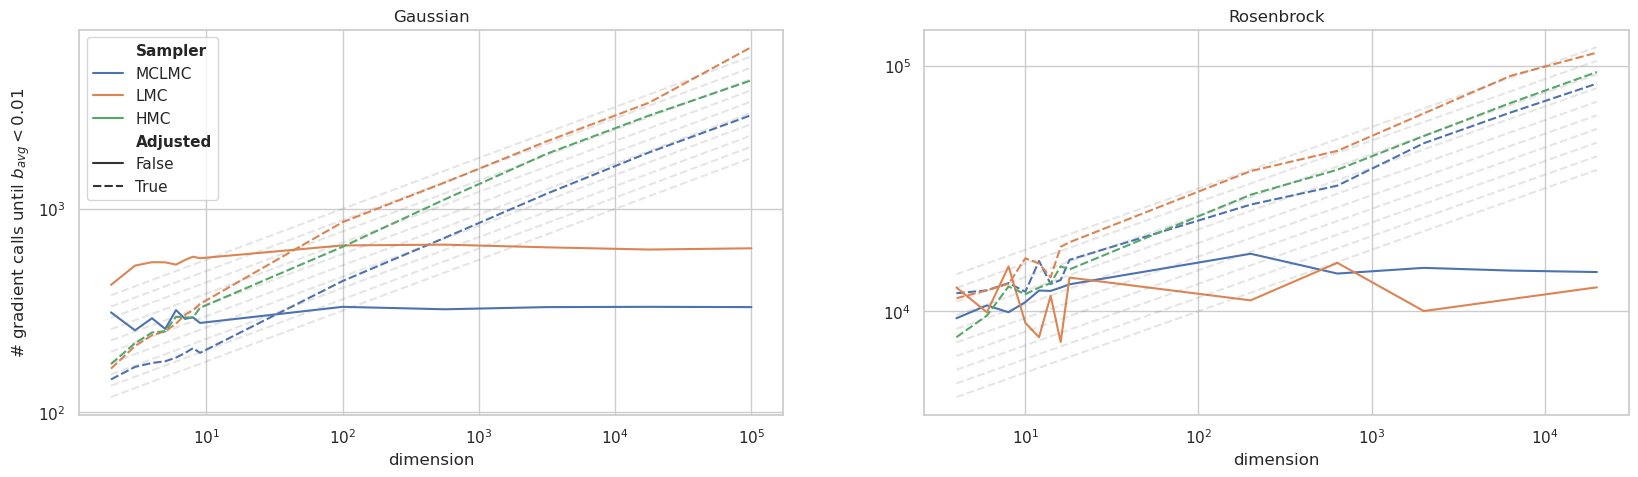

In [6]:
# figure with two subplots: on for gaussian (df) and one for rosenbrock (df_rsbr)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax1)

ax1.set_xscale('log')
ax1.set_yscale('log')
# label axes
ax1.set_ylabel('# gradient calls until $b_{avg} < 0.01$')
ax1.set_xlabel('dimension')
# title
ax1.set_title('Gaussian')

# add legend
ax1.legend()
# bold the word Sampler in the legend
legend = ax1.legend()
for i, text in enumerate(legend.get_texts()):
    if i==4:text.set_weight('bold')
    if i==0:text.set_weight('bold')

x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(2,2.5,10):
    y = x**(1/4) * a
    ax1.plot(x, y, linestyle='--', color='grey', alpha=0.2)

# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)

# plt.legend()
# bold the word Sampler in the legend
# legend = plt.legend()
# for i, text in enumerate(legend.get_texts()):
#     if i==4:text.set_weight('bold')
#     if i==0:text.set_weight('bold')

sns.lineplot(data=df_rsbr, x='dim', y='num_grads_to_low_error', 
    hue='Sampler', 
    style='Adjusted', ax=ax2)

# no legend
ax2.legend().remove()
# remove y axis label
ax2.set_ylabel('')
ax2.set_xlabel('dimension')
# title
ax2.set_title('Rosenbrock')

## y = x^{1/4} lines
x = np.linspace(4, 20000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.0,10):
    y = x**(1/4) * a
    ax2.plot(x, y, linestyle='--', color='grey', alpha=0.2)

ax2.set_xscale('log')
ax2.set_yscale('log')

In [13]:
import numpy as np
import itertools
import pandas as pd
import os 

Ds = np.concatenate([np.arange(2,10), np.ceil(np.logspace(2,4, 5)).astype(int)])[:]


integrator_types = ['velocity_verlet'
                    , 'mclachlan', 
                    'omelyan'
                    ]

samplers = [[
    
    f"adjusted_microcanonical_{integrator_type}", 
    # f"unadjusted_microcanonical__{integrator_type}",
    

                
                ] for integrator_type in integrator_types]

samplers = [
    x
    for xs in samplers
    for x in xs
]

# grid_samplers = [
#     [
#     f"grid_search_adjusted_microcanonical_{integrator_type}",
#     f"grid_search_unadjusted_microcanonical_{integrator_type}",
#      ] for integrator_type in integrator_types]



models = [f"Rosenbrock_{D*2}" for D in Ds]



df_tuned = pd.concat([pd.read_csv(f"results/tuned/Rosenbrock/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df = df_tuned

# df_grid = pd.concat([pd.read_csv(f"results/grid_search/Gaussian/{sampler}_{model}.csv") for sampler, model in itertools.product(samplers, models)], ignore_index=True)

df["dim"] = df["Model"].str.extract(r"(\d+)").astype(int)

df = df[df["max"] == False]
df = df[df["statistic"] == 'x2']
df['Integrator'] = df['Sampler'].apply(lambda x: x.split('_')[-1])
df['Sampler'] = df['Sampler'].apply(lambda x: x.split('_')[0]+x.split('_')[1]+x.split('_')[2] if x[0]=='g' else x.split('_')[0])
df['ESS'] = 100/df["num_grads_to_low_error"]
# df=df[df["Sampler"]=='adjusted_microcanonical_velocity_verlet']





Text(0.5, 1.0, 'Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler')

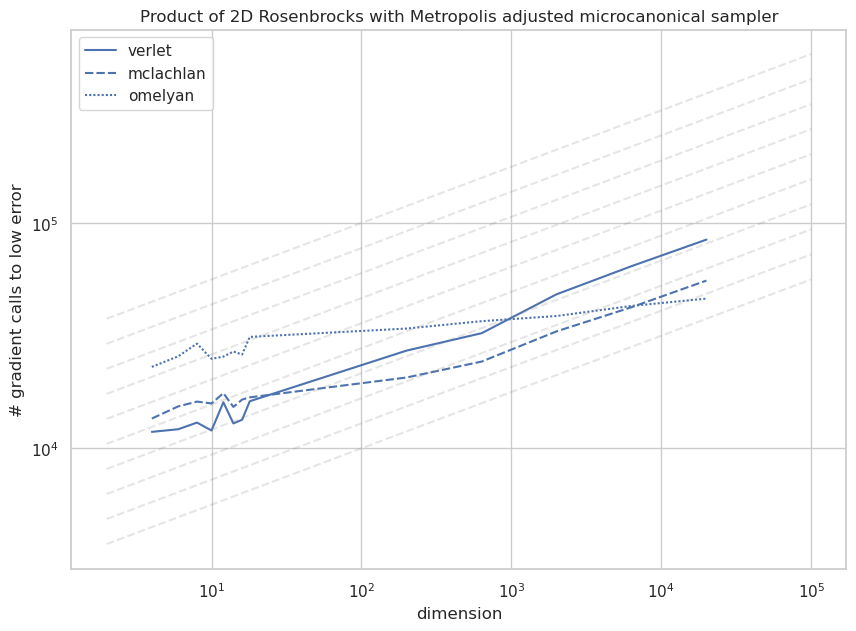

In [21]:
# plot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

sns.lineplot(data=df, x='dim', y='num_grads_to_low_error', 
    # hue='Sampler', 
    style='Integrator', ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')

plt.ylabel('# gradient calls to low error')
plt.xlabel('dimension')

## y = x^{1/4} lines
x = np.linspace(2, 100000, 1000)
y = x**(1/4)
# ax.plot(x, y, label='$x^{1/4}$', color='grey', linestyle='--', alpha=0.2)
for a in np.logspace(3.5,4.5,10):
    y = x**(1/4) * a
    ax.plot(x, y, linestyle='--', color='grey', alpha=0.2)
# 1/8
# y = x**(1/8)
# ax.plot(x, y, label='$x^{1/8}$', linestyle='--', color='grey', alpha=0.2)
plt.legend()
plt.title("Product of 2D Rosenbrocks with Metropolis adjusted microcanonical sampler")